In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys,inspect,pickle,json,time,datetime,re; root = os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))
import random as rn
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
root

TARGET = 'activity'
DATA_DIR = 'activity-atactic'
INPUT_FOLDER = 'v02_add55x5x3roll'#'v11_whole_year_noshift_noroll'#'v10_one_month_noshift'#v10_one_month_noshift 'v09_one_month'#'v02_add55x5x3roll' # 'v01_original_clean'##'v00_original'
EXTRA_DATA1 = 'v00_original\\activity_test_timestamps.csv'

# load
train_data = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'train.pkl'),"rb"))
test_data  = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'test.pkl'),"rb"))
extra_data1 = pd.read_csv(os.path.join(root,'input',DATA_DIR,EXTRA_DATA1), index_col="date", parse_dates=["date"])
print('train_data',train_data.shape, 'test_data',test_data.shape, 'extra_data1',extra_data1.shape)#, 'atactic_test_target',atactic_test_target.shape,time.time()-tic,'sec')
ac_tags = pd.read_csv('activity_tags.csv',delimiter=';')
def feat_desc(fname): desc = ac_tags[ac_tags.feature==fname][['description','units']].values[0]; return desc[0] + ', ' + desc[1]
print(train_data.index[0], train_data.index[-1])
feat_desc('f23')


train_data (300737, 881) test_data (85891, 880) extra_data1 (85891, 0)
2018-02-13 14:31:00 2018-12-31 22:07:00


'Расход ТЭА к R2, л/c'

In [2]:
test_data.tail()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f46_6H_min,f47_6H_min,f48_6H_min,f49_6H_min,f50_6H_min,f51_6H_min,f52_6H_min,f53_6H_min,f54_6H_min,f55_6H_min
date,,,,,,,,,,,,,,,,,,,,,
2019-03-13 23:56:00,50.067841,297.377600,1.650564,0.00005,0.020548,0.001808,1.716801e+06,736386.942702,2.500210,0.534635,...,336.42688,336.4898,336.1522,336.2317,342.9049,332.7594,332.70145,492.185205,496.125787,504.365921
2019-03-13 23:57:00,50.065559,297.376690,1.649752,0.00005,0.020549,0.001804,1.716301e+06,735791.852656,2.500291,0.534372,...,336.42688,336.4898,336.1522,336.2317,342.9049,332.7594,332.70145,492.185205,496.125787,504.365921
2019-03-13 23:58:00,50.042580,297.365780,1.650221,0.00005,0.020551,0.001796,1.716224e+06,733531.249319,2.500176,0.534309,...,336.42688,336.4898,336.1522,336.2317,342.9049,332.7594,332.70145,492.185205,496.125787,504.365921
2019-03-13 23:59:00,50.022259,297.362021,1.650522,0.00005,0.020559,0.001779,1.716358e+06,735581.798870,2.500185,0.534332,...,336.42688,336.4898,336.1522,336.2317,342.9049,332.7594,332.70145,492.185205,496.125787,504.365921
2019-03-14 00:00:00,50.001801,297.379650,1.650972,0.00005,0.020551,0.001775,1.716858e+06,733989.093625,2.500373,0.534659,...,336.42688,336.4898,336.1522,336.2317,342.9049,332.7594,332.70145,492.185205,496.125787,504.365921


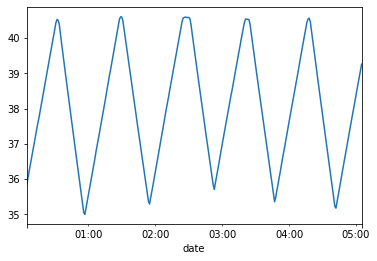

In [3]:
start = '2018-04-01 00:05:00'
end = '2018-04-01 05:05:00'

(train_data[['f53','f54','f55']].max(axis=1)/1000 + 30)[start:end].plot()

#max([train_data['f53'],train_data['f54'],train_data['f55']]).plot()

0.022149800515279885


D:\Programs\x64\Anaconda_3_2019_07\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
D:\Programs\x64\Anaconda_3_2019_07\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


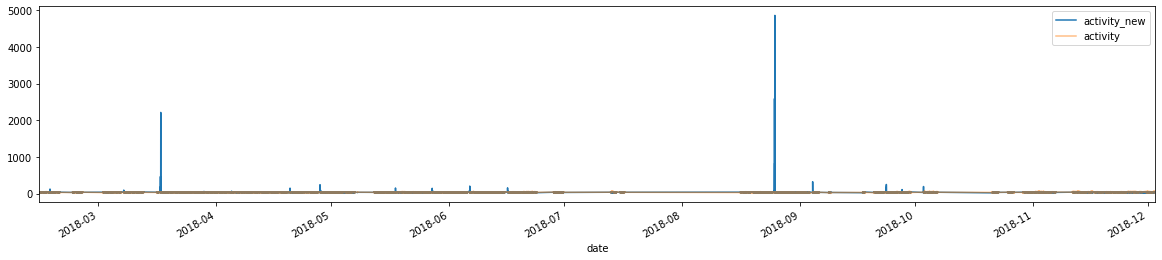

In [4]:
start = '2018-01-04 00:05:00'
end = '2018-12-05 05:05:00'

def f(fnum): return train_data['f'+str(fnum)]#[0]#round(train_data['f'+str(fnum)][0],4)

catal_r1 = f(4)+f(22)+f(5)+f(3)
catal_r2 = f(12)+f(23)+f(13)+f(11)
prop_r1 = f(2)+f(20)
prop_r2 = f(10)+f(21)
#mean_weight = (train_data['f53']/1000 + train_data['f54']/1000 + train_data['f55']/1000 )/3
#mean_weight = (train_data['f53'] + train_data['f54'] + train_data['f55'] )/3
mean_weight = train_data[['f53','f54','f55']].max(axis=1) #/1000 + 30)
print((catal_r1/prop_r1 + catal_r2/prop_r2)[0])


#formula = 1000 * (catal_r1/prop_r1 + catal_r2/prop_r2)
#formula = (prop_r1/catal_r1 + prop_r2/catal_r2)/2
#formula = mean_weight/(prop_r1/catal_r1 + prop_r2/catal_r2)

#formula = f(35)*0.3 + mean_weight*2#/ ( (catal_r1/prop_r1 + catal_r2/prop_r2) )

# k1=0.3; k2=2; d2=1000; b=0
#k1=0.2; k2=2; d2=800; b=0
k1=0.2; k2=2; d2=800; b=0

formula = f(35)*k1 + mean_weight*k2 + b#/ ( (catal_r1/prop_r1 + catal_r2/prop_r2) )
    
#formula = f(35)*0.1 + mean_weight*2#/ ( (catal_r1/prop_r1 + catal_r2/prop_r2) )


train_data['activity_new'] = formula/d2
#((train_data['activity_new'][start:end]*10)-430).plot()
train_data['activity_new'][start:end].plot(figsize=(20,4))

train_data['activity'][start:end].plot(alpha=0.5)
plt.legend()

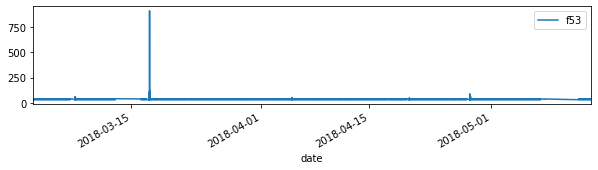

In [5]:
start = '2019-01-01 00:05:00'
end = '2019-12-02 13:05:00'
#test_data['activity'][start:end].plot()
#(test_data['f53'][start:end]/1000 + 30).plot()#figsize=(10,4))
#(train_data['f53']['2018-01-01 00:05:00':'2018-03-14 00:00:00']/1000 + 30).plot(figsize=(10,2))#figsize=(10,4))
(train_data['f53']['2018-03-01 00:05:00':'2018-05-14 00:00:00']/1000 + 30).plot(figsize=(10,2))#figsize=(10,4))

##(test_data['f54'][start:end]/1000 + 30).plot()#figsize=(10,4))
#(test_data['f55'][start:end]/1000 + 30).plot()#figsize=(10,4))
#(test_data[['f53','f54','f55']].max(axis=1)/1000 + 50)[start:end].plot()

plt.legend()

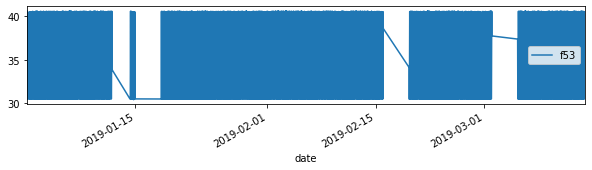

In [6]:
start = '2019-01-01 00:05:00'
end = '2019-12-02 13:05:00'
#test_data['activity'][start:end].plot()
(test_data['f53'][start:end]/1000 + 30).plot(figsize=(10,2))#figsize=(10,2))
#(train_data['f53']['2018-01-01 00:05:00':'2018-03-14 00:00:00']/1000 + 30).plot(figsize=(10,4))#figsize=(10,4))

##(test_data['f54'][start:end]/1000 + 30).plot()#figsize=(10,4))
#(test_data['f55'][start:end]/1000 + 30).plot()#figsize=(10,4))
#(test_data[['f53','f54','f55']].max(axis=1)/1000 + 50)[start:end].plot()

plt.legend()

In [ ]:
start = '2019-01-01 00:05:00'
end = '2019-12-05 05:05:00'
def f(fnum): return test_data['f'+str(fnum)]#[0]#round(train_data['f'+str(fnum)][0],4)

catal_r1 = f(4)+f(22)+f(5)+f(3)
catal_r2 = f(12)+f(23)+f(13)+f(11)
prop_r1 = f(2)+f(20)
prop_r2 = f(10)+f(21)
mean_weight = train_data[['f53','f54','f55']].max(axis=1) #/1000 + 30)
print((catal_r1/prop_r1 + catal_r2/prop_r2)[0])
# k1=0.3; k2=2; d2=1000; b=0
#k1=0.2; k2=2; d2=800; b=0
k1=0.2; k2=2; d2=800; b=0
formula = f(35)*k1 + mean_weight*k2 + b#/ ( (catal_r1/prop_r1 + catal_r2/prop_r2) )
test_data['activity_new'] = formula/d2
test_data['activity_new'][start:end].plot(figsize=(20,4))
#train_data['activity'][start:end].plot(alpha=0.5)
plt.legend()

In [ ]:
start = '2018-04-01 19:05:00' #'2018-04-04 19:05:00' 
end   = '2018-05-04 19:05:00' #'2018-04-26 19:05:00'#'2018-04-09 05:05:00'#
# start = '2018-04-01 00:05:00'
# end = '2018-04-01 05:05:00'
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
_plot('f35',0.001,0)

plt.legend(loc='lower left')

In [ ]:
start = '2018-04-01 00:05:00'
end = '2018-04-01 05:05:00'
train_data['activity'][start:end].plot()
((train_data['f17'][start:end] - 343.15)*100+18).plot(figsize=(10,6))#figsize=(10,40))#figsize=(10,4))
((train_data['f46'][start:end] - 343.15)*50+370).plot()#figsize=(10,40))#figsize=(10,4))
((train_data['f47'][start:end] - 343.15)*50+370).plot()#figsize=(10,40))#figsize=(10,4))
((train_data['f41'][start:end] - 343.15)*100+10).plot()#figsize=(10,40))#figsize=(10,4))
((train_data['f39'][start:end] - 343.15)*100+5).plot()#figsize=(10,40))#figsize=(10,4))

plt.legend()

In [ ]:
start = '2018-04-01 00:05:00'
end = '2018-04-01 13:05:00'
train_data['activity'][start:end].plot()
(train_data['f53'][start:end]/1000 + 30).plot()#figsize=(10,4))
(train_data['f54'][start:end]/1000 + 30).plot()#figsize=(10,4))
(train_data['f55'][start:end]/1000 + 30).plot()#figsize=(10,4))
(train_data[['f53','f54','f55']].max(axis=1)/1000 + 50)[start:end].plot()

plt.legend()

In [ ]:
(train_data['activity'])[:'2018-04-01 03:05:00'].plot()
plt.legend()

In [ ]:
start = '2018-04-01 00:05:00'
end = '2018-04-01 03:05:00'
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(figsize=(6,6),label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
_plot('f2',1000,1685)
_plot('f20',1000,1615)
_plot('f4',1000,10)
_plot('f22',1000,5)
_plot('f5',1000,5)
_plot('f3',1000,5)
_plot('f0',1,0)

plt.legend(loc='lower left')

In [ ]:
start = '2018-04-01 00:05:00'
end = '2018-04-01 03:05:00'
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(figsize=(10,6),label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
_plot('f6',0.00001,-15)
_plot('f35',0.00001,-15)
_plot('f37',0.00001,-15)

plt.legend(loc='lower left')

In [ ]:
start = '2018-04-01 00:05:00'
end = '2018-04-01 03:05:00'
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(figsize=(10,6),label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
_plot('f1',100,29590)
_plot('f24',100,27330)
_plot('f38',100,34310)

plt.legend(loc='lower left')

In [ ]:
start = '2018-04-01 00:05:00'
end = '2018-04-04 03:05:00'
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(figsize=(7,5),label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
#_plot('f42',100,26250)
_plot('f42',1,200)

_plot('f43',0.01,1001)
_plot('f44',1,0)

plt.legend(loc='lower left')

In [ ]:
#(train_data['activity']+30)[:'2018-04-01 12:05:00'].plot()
#(train_data['f33']-273.15)[:'2018-04-01 03:05:00'].plot()
#(train_data['f39']-273.15)[:'2018-04-01 12:05:00'].plot()

end = None
start = '2018-04-02 13:05:00'
end = '2018-04-02 17:05:00'

((train_data['f53']+train_data['f54']+train_data['f55'])/300 + 0)[start:end].plot()
((train_data['f53'])/1000 + 30)[start:end].plot()

train_data['activity'][start:end].plot()

plt.legend()

In [ ]:
for col in ['f4','f22','f5','f3','f2']: #train_data.columns:
    train_data[col][:'2018-04-01 12:05:00'].plot()
    
plt.legend()

In [ ]:
start = '2018-04-01 19:05:00' #'2018-04-04 19:05:00' 
end   = '2018-05-04 19:05:00' #'2018-04-26 19:05:00'#'2018-04-09 05:05:00'#
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(figsize=(17,5),label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
_plot('f35',0.001,0)

plt.legend(loc='lower left')

In [ ]:
start = '2018-04-01 19:05:00' #'2018-04-04 19:05:00' 
end   = '2018-05-04 19:05:00' #'2018-04-26 19:05:00'#'2018-04-09 05:05:00'#
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(figsize=(17,5),label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
_plot('f37',0.001,150)
#_plot('f37',1,0)

plt.legend(loc='lower left')

In [ ]:
start = '2018-04-01 19:05:00' #'2018-04-04 19:05:00' 
end   = '2018-05-04 19:05:00' #'2018-04-26 19:05:00'#'2018-04-09 05:05:00'#
def _plot(fname,mult,sub): 
    ((train_data[fname][start:end])*mult-sub).plot(figsize=(17,5),label=fname+';'+feat_desc(fname))

train_data['activity'][start:end].plot()
_plot('f1',1,273.15)
_plot('f24',1,273.15)
#_plot('f24',1,0)
_plot('f38',1,273.15)

#_plot('f37',1,0)

plt.legend(loc='lower left')

In [ ]:
def f(fnum): return train_data['f'+str(fnum)][0]#round(train_data['f'+str(fnum)][0],4)

In [ ]:
f(2), f(20)

In [ ]:
f(4), f(22), f(5), f(3), f(4)+f(22)+f(5)+f(3)

In [ ]:
1000 * (f(4)+f(22)+f(5)+f(3))/f(2)

In [ ]:
1000 * (f(12)+f(23)+f(13)+f(11))/f(10)

In [ ]:
1000 * (f(4)+f(22)+f(5)+f(3))/f(2) + 1000 * (f(12)+f(23)+f(13)+f(11))/f(10)